In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.colors as colors
import matplotlib.patches as mpatches

In [2]:
# Order of all possible bins for plotting
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]',
         '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]',
         '(100, 150]', '(150, 200]', '(200, 500]', '(500, 1000]']

In [3]:
def get_order(reaches, order):
    # Make sorted list of bins present
    ordered = []
    reach_bins = list(set(reaches[binn].to_list()))

    for i in order:
        if i in reach_bins:
            ordered.append(i)
            
    return ordered

In [4]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

## Get data

### Min

In [5]:
width = 'min'
binn = 'Bin_Min' #'Bin_Max'
data_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_01_2025_03_02_' + width

In [6]:
reaches_min = []

for file in os.listdir(data_path):
    if not file.startswith('.'):
        if 'min' in file:
            reaches_min.append(file)

In [7]:
# Read in all files
d = []

for file in reaches_min:
    data = pd.read_parquet(os.path.join(data_path, file))
    d.append(data)

In [8]:
# Make reaches dataframe
reaches_min = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})
reaches_min['coverage'] = reaches_min['coverage']*100

In [9]:
reaches_min['width'] = width

In [10]:
# Make sorted list of bins present
ordered_min = []
reach_bins = list(set(reaches_min[binn].to_list()))

for i in order:
    if i in reach_bins:
        ordered_min.append(i)

### Mean

In [11]:
width = 'mean'
binn = 'Bin' #'Bin_Max'
data_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_01_2025_03_02_' + width

In [12]:
reaches_mean = []

for file in os.listdir(data_path):
    if not file.startswith('.'):
        if 'min' in file:
            reaches_mean.append(file)

In [13]:
# Read in all files
d = []

for file in reaches_mean:
    data = pd.read_parquet(os.path.join(data_path, file))
    d.append(data)

In [14]:
# Make reaches dataframe
reaches_mean = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})
reaches_mean['coverage'] = reaches_mean['coverage']*100

In [15]:
reaches_mean['width'] = width

In [16]:
# Make sorted list of bins present
ordered_mean = []
reach_bins = list(set(reaches_mean[binn].to_list()))

for i in order:
    if i in reach_bins:
        ordered_mean.append(i)

### Max

In [17]:
width = 'max'
binn = 'Bin_Max'
data_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_01_2025_03_02_' + width

In [18]:
reaches_max = []

for file in os.listdir(data_path):
    if not file.startswith('.'):
        if 'min' in file:
            reaches_max.append(file)

In [19]:
# Read in all files
d = []

for file in reaches_max:
    data = pd.read_parquet(os.path.join(data_path, file))
    d.append(data)

In [20]:
# Make reaches dataframe
reaches_max = pd.concat(d, axis=0, ignore_index=True)#.rename(columns={'Unnamed: 0': 'stat'})
reaches_max['coverage'] = reaches_max['coverage']*100

In [21]:
reaches_max['width'] = width

In [22]:
# Make sorted list of bins present
ordered_max = []
reach_bins = list(set(reaches_max[binn].to_list()))

for i in order:
    if i in reach_bins:
        ordered_max.append(i)

In [23]:
del d

## Plot

In [24]:
save_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/figures_for_2025_03_03/'

In [30]:
min_patch = mpatches.Patch(color='royalblue', label='Min width')
mean_patch = mpatches.Patch(color='k', label='Mean width')
max_patch = mpatches.Patch(color='m', label='Max width')

In [25]:
binn0 = ordered_min[0]

In [26]:
min_cov = reaches_min[reaches_min['Bin_Min'] == binn0]['coverage']

n_min = np.arange(1, len(min_cov)+1) / float(len(min_cov))
min_cdf = np.sort(min_cov)

del min_cov

In [27]:
mean_cov = reaches_mean[reaches_mean['Bin'] == binn0]['coverage']

n_mean = np.arange(1, len(mean_cov)+1) / float(len(mean_cov))
mean_cdf = np.sort(mean_cov)

del mean_cov

In [28]:
max_cov = reaches_max[reaches_max['Bin_Max'] == binn0]['coverage']

n_max = np.arange(1, len(max_cov)+1) / float(len(max_cov))
max_cdf = np.sort(max_cov)

del max_cov

Text(0, 0.5, 'Proportion')

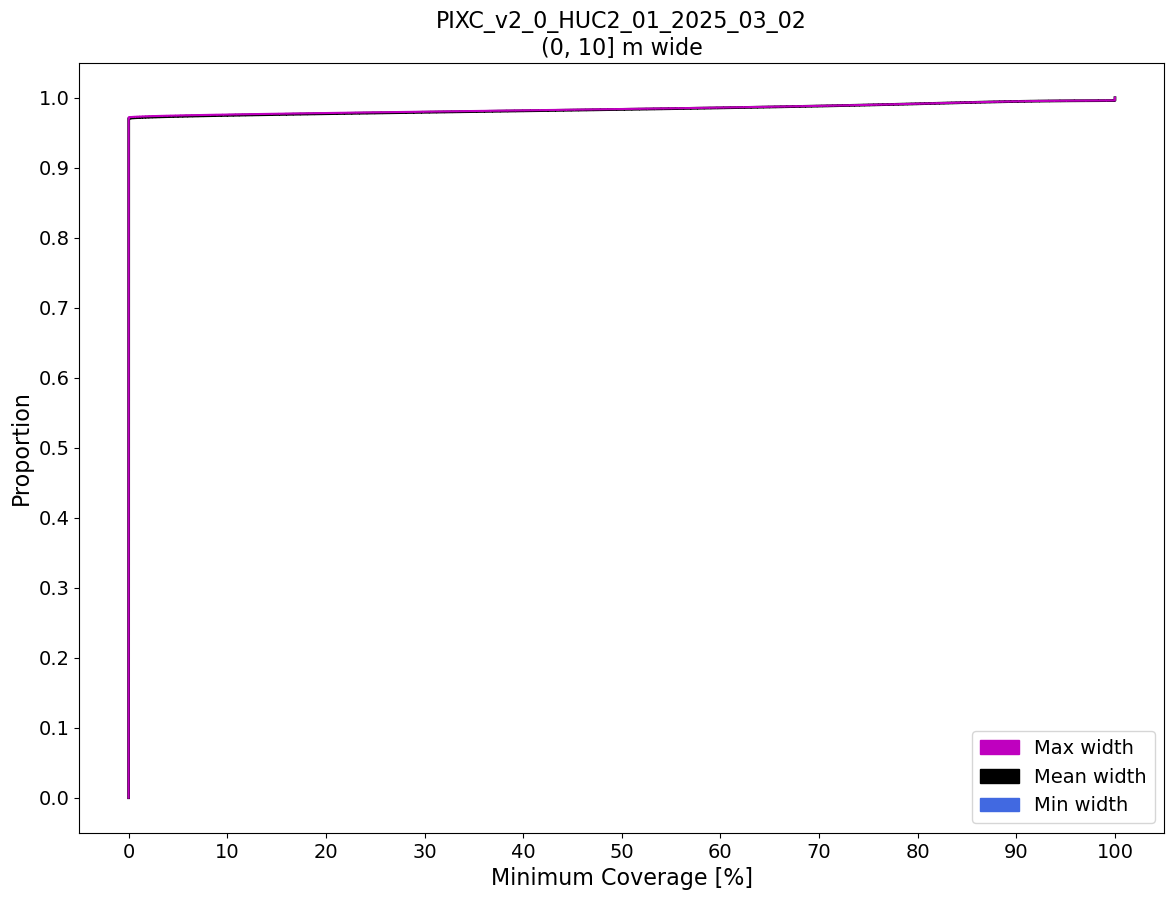

In [31]:
fig, ax = plt.subplots(figsize=(14,10))

# ax.step(min_cdf, n_min, color='royalblue')
ax.step(mean_cdf, n_mean, color='k', linewidth=2)
ax.step(max_cdf, n_max, color='m')

plt.legend(handles=[max_patch, mean_patch, min_patch
                   ],
           prop={'size': 14}, loc='lower right')

plt.yticks(np.arange(0,1.05,step=0.1), fontsize=14);
plt.xticks(np.arange(0,105,step=10), fontsize=14);

plt.title('PIXC_v2_0_HUC2_01_2025_03_02\n' + binn0 + ' m wide', fontsize=16);

plt.xlabel('Minimum Coverage [%]', fontsize=16)
plt.ylabel('Proportion', fontsize=16)

# plt.savefig(fname=save_path + 'min_detect_cdf_' + binn0 + '.png', bbox_inches='tight')